In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cd data/

/home/mrk/diod_shottky/data


In [5]:
ls # напряжения, при которых снималась ВАХ и которые нужно перевести в температуру 

3.38-3.27.txt  3.68-3.9.txt  3.69-3.89.txt  4.32-4.28.txt  4.89-4.96.txt


# Определение температур, при которых измерялись ВАХ, с погрешностями
Для того, чтобы определить температуру, при которой проходило измерение, зависимость напряжения от температуры на каждом участке клалась прямой (по формуле для прямой через две точки).

In [6]:
def lin_func(x, x1, x2, y1, y2):
    return (y2 - y1) * (x - x1) / (x2 - x1) + y1

In [7]:
# 3.38-3.27 --- интервал напряжений, где измерялась ВАХ (мВ)
x_start = 3.38
x_final = 3.27

# интервал с таблицы
x1 = 3.020  # мВ
x2 = 3.653  # мВ
y1 = 210  # К
y2 = 230  # К

x_izm_err = 1e-2  # измерительная погрешность (мВ)

Ts = np.array([lin_func(x_start, x1, x2, y1, y2),
               lin_func(x_final, x1, x2, y1, y2)])  # К

T1 = Ts.mean()

T_izm_err = (y2 - y1) * x_izm_err / (x2 - x1)
T1_err = np.sqrt(Ts.std()**2 + T_izm_err**2)

print(f"T = {T1:.4} +- {T1_err:.2} К")

T = 219.6 +- 1.8 К


In [8]:
# 3.68-3.9 --- интервал напряжений, где измерялась ВАХ (мВ)
x_start = 3.68
x_final = 3.9

# интервал с таблицы
x1 = 3.653  # мВ
x2 = 3.980  # мВ
y1 = 230  # К
y2 = 240  # К

x_izm_err = 1e-2  # измерительная погрешность (мВ)

Ts = np.array([lin_func(x_start, x1, x2, y1, y2),
               lin_func(x_final, x1, x2, y1, y2)])  # К

T2 = Ts.mean()

T_izm_err = (y2 - y1) * x_izm_err / (x2 - x1)
T2_err = np.sqrt(Ts.std()**2 + T_izm_err**2)

print(f"T = {T2:.4} +- {T2_err:.2} К")

T = 234.2 +- 3.4 К


In [9]:
# 3.69-3.89 --- интервал напряжений, где измерялась ВАХ (мВ)
x_start = 3.69
x_final = 3.89

# интервал с таблицы
x1 = 3.653  # мВ
x2 = 3.980  # мВ
y1 = 230  # К
y2 = 240  # К

x_izm_err = 1e-2  # измерительная погрешность (мВ)

Ts = np.array([lin_func(x_start, x1, x2, y1, y2),
               lin_func(x_final, x1, x2, y1, y2)])  # К

T3 = Ts.mean()

T_izm_err = (y2 - y1) * x_izm_err / (x2 - x1)
T3_err = np.sqrt(Ts.std()**2 + T_izm_err**2)

print(f"T = {T3:.4} +- {T3_err:.2} К")

T = 234.2 +- 3.1 К


In [10]:
# 4.32-4.28 --- интервал напряжений, где измерялась ВАХ (мВ)
x_start = 4.32
x_final = 4.28

# интервал с таблицы
x1 = 3.980  # мВ
x2 = 4.330  # мВ
y1 = 240  # К
y2 = 250  # К

x_izm_err = 1e-2  # измерительная погрешность (мВ)

Ts = np.array([lin_func(x_start, x1, x2, y1, y2),
               lin_func(x_final, x1, x2, y1, y2)])  # К

T4 = Ts.mean()

T_izm_err = (y2 - y1) * x_izm_err / (x2 - x1)
T4_err = np.sqrt(Ts.std()**2 + T_izm_err**2)

print(f"T = {T4:.4} +- {T4_err:.2} К")

T = 249.1 +- 0.64 К


In [11]:
# 4.89-4.96 --- интервал напряжений, где измерялась ВАХ (мВ)
x_start = 4.89
x_final = 4.96

# интервал с таблицы
x1 = 4.660  # мВ
x2 = 5.010  # мВ
y1 = 260  # К
y2 = 270  # К

x_izm_err = 1e-2  # измерительная погрешность (мВ)

Ts = np.array([lin_func(x_start, x1, x2, y1, y2),
               lin_func(x_final, x1, x2, y1, y2)])  # К

T5 = Ts.mean()

T_izm_err = (y2 - y1) * x_izm_err / (x2 - x1)
T5_err = np.sqrt(Ts.std()**2 + T_izm_err**2)

print(f"T = {T5:.4} +- {T5_err:.2} К")

T = 267.6 +- 1.0 К


# Cемейство ВАХ диода Шоттки при различных температурах

In [63]:
vi1 = np.genfromtxt("3.38-3.27.txt")
vi1[:, 1] /= 10

vi2 = np.genfromtxt("3.68-3.9.txt")
vi2[:, 1] /= 10

vi3 = np.genfromtxt("3.69-3.89.txt")
vi3[:, 1] /= 10

vi4 = np.genfromtxt("4.32-4.28.txt")
vi4[:, 1] /= 10

vi5 = np.genfromtxt("4.89-4.96.txt")
vi5[:, 1] /= 10

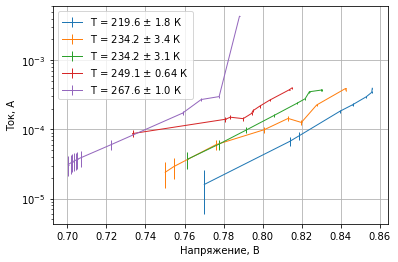

In [72]:
v_izm_err = 1e-4  # В
i_izm_err = 1e-5  # А

plt.errorbar(vi1[:, 0], vi1[:, 1], xerr=v_izm_err, yerr=i_izm_err,
             label=fr"T = {T1:.4} $\pm$ {T1_err:.2} К", lw=1)
plt.errorbar(vi2[:, 0], vi2[:, 1], xerr=v_izm_err, yerr=i_izm_err,
             label=fr"T = {T2:.4} $\pm$ {T2_err:.2} К", lw=1)
plt.errorbar(vi3[:, 0], vi3[:, 1], xerr=v_izm_err, yerr=i_izm_err,
             label=fr"T = {T3:.4} $\pm$ {T3_err:.2} К", lw=1)
plt.errorbar(vi4[:, 0], vi4[:, 1], xerr=v_izm_err, yerr=i_izm_err,
             label=fr"T = {T4:.4} $\pm$ {T4_err:.2} К", lw=1)
plt.errorbar(vi5[:, 0], vi5[:, 1], xerr=v_izm_err, yerr=i_izm_err,
             label=fr"T = {T5:.4} $\pm$ {T5_err:.2} К", lw=1)

plt.yscale('log')

plt.xlabel('Напряжение, В')
plt.ylabel('Ток, А')

plt.grid()
plt.legend(loc=2)